<div style="border:solid black 2px; padding: 20px"><h1 style="color:black; margin-bottom:20px">Reviewer's comment v1</h1>
Halo Juliman !

Perkenalkan saya disini sebagai Code Reviewers, disini dengan senang hati saya akan mereview tugas Juliman ya.

Saya akan memberikan beberapa komen seperti dibawah ini, tolong jangan dipindah, dirubah, maupun dihapus ya.

Komen yang saya berikan akan muncul dalam warna hijau, kuning, atau pun merah seperti ini:

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

<div class="alert alert-warning">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Terdapat beberapa catatan.

</div>

<div class="alert alert-danger">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Perlu beberapa perbaikan

</div>

Dan tentu saja Juliman dapat menjawab saya dengan menggunakan ini

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>
    
Baik kak
</div>

# Pendeteksi Wajah dengan Visi Komputer (ResNet50)

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Pengantar-Proyek" data-toc-modified-id="Pengantar-Proyek-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Pengantar Proyek</a></span><ul class="toc-item"><li><span><a href="#Deskripsi-Proyek" data-toc-modified-id="Deskripsi-Proyek-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Deskripsi Proyek</a></span></li><li><span><a href="#Tujuan-Proyek" data-toc-modified-id="Tujuan-Proyek-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Tujuan Proyek</a></span></li></ul></li><li><span><a href="#Inisialisasi" data-toc-modified-id="Inisialisasi-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Inisialisasi</a></span></li><li><span><a href="#Memuat-Data" data-toc-modified-id="Memuat-Data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Memuat Data</a></span></li><li><span><a href="#Pemisahan-Dataset" data-toc-modified-id="Pemisahan-Dataset-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Pemisahan Dataset</a></span></li><li><span><a href="#EDA" data-toc-modified-id="EDA-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>EDA</a></span><ul class="toc-item"><li><span><a href="#Distribusi-Usia-pada-Dataset" data-toc-modified-id="Distribusi-Usia-pada-Dataset-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Distribusi Usia pada Dataset</a></span></li><li><span><a href="#Sample-Foto-dan-Usia" data-toc-modified-id="Sample-Foto-dan-Usia-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Sample Foto dan Usia</a></span></li></ul></li><li><span><a href="#Pemodelan" data-toc-modified-id="Pemodelan-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Pemodelan</a></span><ul class="toc-item"><li><span><a href="#Menyiapkan-Skrip-untuk-Dijalankan-pada-Platform-GPU" data-toc-modified-id="Menyiapkan-Skrip-untuk-Dijalankan-pada-Platform-GPU-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Menyiapkan Skrip untuk Dijalankan pada Platform GPU</a></span></li><li><span><a href="#Output" data-toc-modified-id="Output-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span><em>Output</em></a></span></li></ul></li><li><span><a href="#Kesimpulan" data-toc-modified-id="Kesimpulan-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Kesimpulan</a></span></li></ul></div>

## Pengantar Proyek

### Deskripsi Proyek
Suatu waralaba supermarket bernama Good Seed ingin mengetahui apakah Data Science dapat membantu mereka mematuhi hukum dengan memastikan bahwa mereka tidak menjual produk yang memiliki batasan usia kepada pelanggan di bawah umur. Toko-toko dari waralaba ini dilengkapi dengan kamera di area kasir yang akan menampilkan sinyal ketika seseorang membeli produk dengan batasan usia. Metode visi komputer bisa digunakan untuk menentukan usia seseorang dari foto. Tugas dalam proyek ini adalah mengevaluasi sebuah model untuk memverifikasi usia seseorang.Data yang diberikan berisikan satu set foto orang dengan keterangan usianya.

### Tujuan Proyek
Tujuan proyek ini adalah melatih sebuah model yang dapat memprediksi usia dari pelanggan agar dapat menghindari penjualan produk yang memiliki batasan usia kepada pelanggan dibawah umur.

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

## Inisialisasi

In [1]:
import pandas as pd

import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam

import warnings
warnings.filterwarnings("ignore")

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

## Memuat Data

*Dataset* yang Anda perlukan disimpan di folder `/datasets/faces/`. Pada folder tersebut, Anda bisa menemukan: 
- Folder `final_files` dengan 7,6 ribu foto
- *File* `labels.csv` yang memuat label, dengan dua kolom: `file_name` dan `real_age`

Mengingat jumlah *file* gambar cukup banyak, metode pemuatan data yang dinamis (dynamic data loading) dengan membuat generator akan digunakan. Generator ini akan menghasilkan batch data secara dinamis selama proses pelatihan model. Generator ini akan mengatasi batasan memori sehingga mendukung pelatihan pada dataset yang sangat besar. ImageDataGenerator adalah kelas yang digunakan sebagai generator yang merupakan bagian dari framework Keras.

In [2]:
# Membaca Label Gambar
labels = pd.read_csv('/datasets/faces/labels.csv')

# Membuat Data Augmentasi
datagen = ImageDataGenerator(validation_split = 0.25, 
                             rescale = 1./255, 
                             horizontal_flip = True, 
                             vertical_flip = True, 
                             rotation_range = 90)

# Membuat Generator Pelatihan
train_gen_flow = datagen.flow_from_dataframe(
        dataframe=labels,
        directory='/datasets/faces/final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        seed=12345)

Found 7591 validated image filenames.


In [3]:
# Sampel data
labels.head()

,file_name,real_age
0,000000.jpg,4
1,000001.jpg,18
2,000002.jpg,80
3,000003.jpg,50
4,000004.jpg,17


In [4]:
# Informasi data
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7591 entries, 0 to 7590
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_name  7591 non-null   object
 1   real_age   7591 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 118.7+ KB


In [5]:
# Memeriksa nilai yang duplikat
labels.duplicated().sum()

0

Kesimpulan sementara:
1. Ada 7591 gambar pada dataset.
2. Tidak ada nilai yang hilang.
3. Tipe data sudah sesuai.
4. Tidak ada nilai duplikat.

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

## Pemisahan Dataset

Data train telah dibagi menjadi batch kecil menggunakan ImageDataGenerator, dataset fitur dan dataset target/label akan dipisah menjadi 2 dataset baru.

In [6]:
# melakukan separasi fitur dan label
feature, label = next(train_gen_flow)

In [7]:
# shape dari fitur
feature.shape

(32, 224, 224, 3)

Dari batch-1 kita memiliki 32 foto dengan resolusi [224 x 224] dan 3 channel.

In [8]:
# shape dari label
label.shape

(32,)

Dari batch-1 kita memiliki 1 kolom berisi label sebanyak 32 baris. Kedua dataset sudah sesuai, mari kita analisis menggunakan EDA.

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

## EDA

Pada tahap analisis data eksploratif ini ada dua hal yang akan diamati:
1. Distribusi usia pada dataset
2. Sample foto dan usia 

### Distribusi Usia pada Dataset

Berikut ini distribusi usia pada dataset

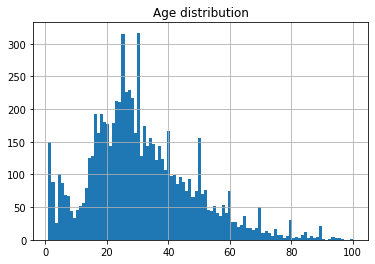

In [9]:
labels['real_age'].hist(bins=100)
plt.title('Age distribution');

### Sample Foto dan Usia

Pada bagian ini gambar dan usia ditampilkan untuk diamati dan dianalisis. Dengan mencocokan foto dan usia, kita dapat memahami kondisi dari dataset yang diberikan

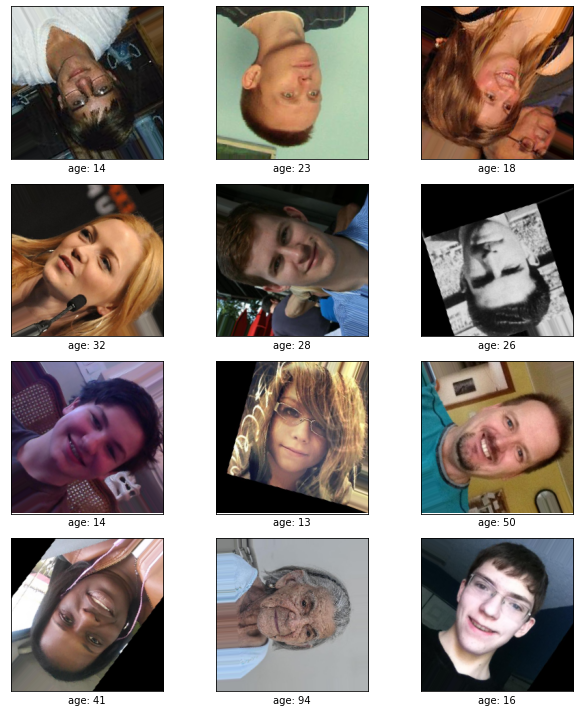

In [10]:
# Mendapatkan indeks random untuk dijadikan 12 sampel foto
rid = np.random.choice(32,12,replace=False)

# plot foto dan usia
fig = plt.figure(figsize=(10,10))
for i,val in enumerate(rid):
    ax = fig.add_subplot(4, 3, i+1)
    plt.imshow(feature[val])
    ax.set_xlabel(f'age: {label[val]}')
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()

Temuan:
1. Dari grafik distribusi usia terlihat bahwa kebanyakan berusia 20 sampai 30 tahun.
2. Antara foto dan usia dataset sudah sesuai

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

## Pemodelan 

Berikut ini fungsi-fungsi yang akan dibuat untuk melatih model CNN

In [11]:
# Fungsi untuk memuat dataset `train`
def load_train(path):
    
    # memuat path untuk data train dan label train
    face_path = path + 'final_files/'
    label_path = path + 'labels.csv'

    # memuat dataset label train
    labels = pd.read_csv(label_path)

    # memuat data train menggunakan ImageDataGenerator    
    train_datagen = ImageDataGenerator(rescale=1/255,validation_split=0.25)
    train_gen_flow = train_datagen.flow_from_dataframe(
        dataframe=labels,
        directory=face_path,
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        seed=12345)
    
    return train_gen_flow

In [12]:
# Fungsi untuk memuat dataset `test`
def load_test(path):
    
    # memuat path untuk data test dan label test
    face_path = path + 'final_files/'
    label_path = path + 'labels.csv'

    # memuat dataset label test
    labels = pd.read_csv(label_path)

    # memuat data test menggunakan ImageDataGenerator   
    test_datagen = ImageDataGenerator(rescale=1/255,validation_split=0.25)
    test_gen_flow = test_datagen.flow_from_dataframe(
        dataframe=labels,
        directory=face_path,
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        seed=12345)

    return test_gen_flow

Tahap berikutnya adalah mendefenisikan model CNN, optimizer, metrik.

In [13]:
# membuat fungsi untuk mendefinisikan model CNN
def create_model(input_shape=(224,224,3)):

    
    # CNN
    resnet = ResNet50(input_shape=input_shape,
                 include_top=False,classes=1000,
                 weights='imagenet') 
    resnet.trainable = True
    model = Sequential()
    model.add(resnet)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(1, activation='relu')) 

    # optimizer dan metrik
    model.compile(
        optimizer=Adam(),
        loss='mean_squared_error',
        metrics=['mae'],
    )

    return model

Berikut nya adalah membuat fungsi untuk melatih dan menguji model CNN.

In [14]:
# Fungsi untuk melatih dan menguji model CNN
def train_model(model, train_data, test_data, batch_size=None, epochs=20,
                steps_per_epoch=None, validation_steps=None):

    
    # training dan validasi model CNN
    model.fit(train_data,
            validation_data=test_data,
            batch_size=batch_size,
            epochs=epochs,
            steps_per_epoch= len(train_data) if steps_per_epoch is None else steps_per_epoch,
            validation_steps= len(test_data) if validation_steps is None else validation_steps,
            verbose=2)

    return model

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

### Menyiapkan Skrip untuk Dijalankan pada Platform GPU

Langkah berikutnya adalah membuat skrip yang akan dijalankan pada platform GPU


In [15]:
# siapkan skrip untuk dijalankan pada platform GPU

init_str = """
import pandas as pd

import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
"""

import inspect

with open('run_model_on_gpu.py', 'w') as f:
    
    f.write(init_str)
    f.write('\n\n')
        
    for fn_name in [load_train, load_test, create_model, train_model]:
        
        src = inspect.getsource(fn_name)
        f.write(src)
        f.write('\n\n')

### *Output*

Berikut ini hasil dari menjalankan run_model_on_gpu.py di Platform GPU:

Train for 238 steps, validate for 238 steps

Epoch 1/20

2023-11-19 16:24:47.869491: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2023-11-19 16:24:48.620456: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudnn.so.7
238/238 - 92s - loss: 226.3520 - mae: 11.5031 - val_loss: 294.1093 - val_mae: 13.3151


Epoch 2/20
238/238 - 75s - loss: 154.5360 - mae: 9.4966 - val_loss: 319.9223 - val_mae: 13.3256

Epoch 3/20
238/238 - 76s - loss: 122.9327 - mae: 8.5169 - val_loss: 522.1894 - val_mae: 17.4679

Epoch 4/20
238/238 - 76s - loss: 106.3505 - mae: 7.8380 - val_loss: 168.3207 - val_mae: 10.0308

Epoch 5/20
238/238 - 75s - loss: 82.4289 - mae: 6.9269 - val_loss: 145.4852 - val_mae: 9.0848

Epoch 6/20
238/238 - 75s - loss: 66.5988 - mae: 6.2968 - val_loss: 164.5818 - val_mae: 9.8029

Epoch 7/20
238/238 - 76s - loss: 50.4945 - mae: 5.5079 - val_loss: 80.3849 - val_mae: 6.7521

Epoch 8/20
238/238 - 76s - loss: 35.7864 - mae: 4.6455 - val_loss: 158.8424 - val_mae: 9.2201

Epoch 9/20
238/238 - 76s - loss: 27.5278 - mae: 4.0819 - val_loss: 58.4569 - val_mae: 6.1161

Epoch 10/20
238/238 - 75s - loss: 21.9783 - mae: 3.6180 - val_loss: 97.9353 - val_mae: 7.5433

Epoch 11/20
238/238 - 75s - loss: 16.7709 - mae: 3.1819 - val_loss: 51.7321 - val_mae: 5.5260

Epoch 12/20
238/238 - 75s - loss: 13.1557 - mae: 2.8135 - val_loss: 27.9051 - val_mae: 4.0896

Epoch 13/20
238/238 - 76s - loss: 11.9498 - mae: 2.6604 - val_loss: 19.3030 - val_mae: 3.3760

Epoch 14/20
238/238 - 75s - loss: 10.4923 - mae: 2.4948 - val_loss: 18.1713 - val_mae: 3.1922

Epoch 15/20
238/238 - 75s - loss: 10.7891 - mae: 2.5251 - val_loss: 28.7618 - val_mae: 4.2595

Epoch 16/20
238/238 - 75s - loss: 11.5110 - mae: 2.6065 - val_loss: 16.5549 - val_mae: 3.0529

Epoch 17/20
238/238 - 75s - loss: 11.8510 - mae: 2.6562 - val_loss: 19.8651 - val_mae: 3.4555

Epoch 18/20
238/238 - 75s - loss: 13.6980 - mae: 2.8392 - val_loss: 21.0733 - val_mae: 3.5308

Epoch 19/20
238/238 - 75s - loss: 16.6368 - mae: 3.1340 - val_loss: 32.1771 - val_mae: 4.2806

Epoch 20/20
238/238 - 75s - loss: 16.7446 - mae: 3.1604 - val_loss: 32.9685 - val_mae: 4.2489

WARNING:tensorflow:sample_weight modes were coerced from
  ...
    to  
  ['...']
238/238 - 37s - loss: 32.9685 - mae: 4.2489

Test MAE: 4.2489



<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

## Kesimpulan

Model ini yang dibuat sudah berhasil dilatih menggunakan ResNet50 untuk memprediksi umur berdasarakan foto.

Berikut ini kesimpulan yang dapat diambil:
1. Foto yang tersedia di dataset sebanyak 7591 image dengan 3 channel.
2. Usia terbanyak pada rentang 20 sampai 30 tahun
3. Model yang digunakan ResNet50 dengan Target mean_absolute_error < 8 telah tercapai. Pada Epoch = 20 didapatkan mae_train = 4.2489 dan mae_test = 4.2489 

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

# Daftar Periksa

- [ ]  *Notebook* dibuka 
- [ ]  Tidak ada kesalahan dalam kode 
- [ ]  Sel dengan kode telah disusun berdasarkan urutan eksekusi 
- [ ]  Analisis data eksploratif telah dijalankan 
- [ ]  Hasil dari analisis data eksploratif ditampilkan pada *notebook* final 
- [ ]  Skor MAE model tidak lebih tinggi dari 8 "
- [ ]  Kode pelatihan model telah disalin ke *notebook* final 
- [ ]  *Output* pelatihan model telah disalin di *notebook* final 
- [ ]  Temuan telah diberikan berdasarkan hasil pelatihan model 